## 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sb
import scipy.stats       as sp

In [2]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(777)

스케일러 라이브러리

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import joblib

## 데이터 불러오기

In [4]:
for i in range (100):
    temp_data = pd.read_csv('./test5/dp%d-blow-thick.csv'%(i+1),skiprows = 4, sep=',')
    s = "thick_dp%d = temp_data"%(i+1)
    exec(s)

In [5]:
for i in range (100):
    temp_data = pd.read_csv('./test5/dp%d-preform-temp.csv'%(i+1),skiprows = 4, sep=',')
    s = "temp_dp%d = temp_data"%(i+1)
    exec(s)

# training, label 분리

In [6]:
temp_dp100

,Curve Length on Polyline 1 [ m ],TEMPERATURE [ C ]
0,0.000000,89.718407
1,0.000965,89.718407
2,0.001931,89.718407
3,0.002889,89.718407
4,0.003837,89.718407
5,0.004780,89.718407
6,0.005883,89.543236
7,0.006988,89.025047
8,0.007967,88.421837
9,0.008953,87.813927


In [7]:
TrainData_ = np.zeros((100,temp_dp1.shape[0]))
for i in range (100):
    exec("TrainData_[i,:] = temp_dp%d.iloc[:,1]"%(i+1))

In [8]:
TrainData = pd.DataFrame(TrainData_)
TrainData

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,110.674400,110.674400,110.674400,110.674400,110.674400,110.674400,110.547905,110.173637,109.737999,109.298943,...,85.898918,80.192070,80.139152,80.087791,80.043541,80.006828,79.999992,79.999992,79.999992,79.999992
1,102.816795,102.816795,102.816795,102.816795,102.816795,102.816795,102.709770,102.393089,102.024467,101.652946,...,81.323662,80.576164,80.417442,80.263390,80.130669,80.020531,79.999992,79.999992,79.999992,79.999992
2,117.379601,117.379601,117.379601,117.379601,117.379601,117.379601,117.335808,117.206261,117.055473,116.903465,...,83.894707,80.960289,80.695763,80.438988,80.217796,80.034233,79.999992,79.999992,79.999992,79.999992
3,94.803185,94.803185,94.803185,94.803185,94.803185,94.803185,94.666954,94.263908,93.794762,93.321953,...,87.370323,81.344414,80.974052,80.614586,80.304894,80.047905,79.999992,79.999992,79.999992,79.999992
4,100.661186,100.661186,100.661186,100.661186,100.661186,100.661186,100.792564,101.181206,101.633598,102.089561,...,82.614128,81.728508,81.252373,80.790154,80.392021,80.061607,79.999992,79.999992,79.999992,79.999992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,116.864403,116.864403,116.864403,116.864403,116.864403,116.864403,116.859520,116.845146,116.828392,116.811485,...,115.938530,116.683037,106.578148,96.769157,88.319694,81.307457,79.999992,79.999992,79.999992,79.999992
96,99.901207,99.901207,99.901207,99.901207,99.901207,99.901207,99.546013,98.495232,97.272087,96.039360,...,116.609886,117.067162,106.856468,96.944756,88.406822,81.321159,79.999992,79.999992,79.999992,79.999992
97,110.593193,110.593193,110.593193,110.593193,110.593193,110.593193,110.578606,110.535423,110.485161,110.434502,...,115.743462,117.451286,107.134758,97.120354,88.493950,81.334831,79.999992,79.999992,79.999992,79.999992
98,112.891197,112.891197,112.891197,112.891197,112.891197,112.891197,112.657646,111.966728,111.162468,110.351891,...,110.625450,117.835381,107.413078,97.295921,88.581047,81.348534,79.999992,79.999992,79.999992,79.999992


In [9]:
thick_dp1

,Curve Length on Polyline 1 [ m ],THICKNESS [ mm ]
0,0.000000,2.945655
1,0.000973,2.934664
2,0.001954,2.894925
3,0.002940,2.800850
4,0.003950,2.626687
5,0.005021,2.323550
6,0.006477,1.871019
7,0.008272,1.399183
8,0.010250,0.973714
9,0.013149,0.599136


In [10]:
TrainLabel_ = []
for i in range(100):
    exec("thick_diff = np.max(thick_dp%d.iloc[:,1])-np.min(thick_dp%d.iloc[:,1])"%(i+1,i+1))
    TrainLabel_=np.append(TrainLabel_,thick_diff)

In [11]:
pd.DataFrame(TrainLabel_)

,0
0,2.682317
1,2.675287
2,2.766200
3,2.500556
4,2.613830
...,...
95,2.614353
96,2.513997
97,2.517421
98,2.687295


In [12]:
pd.DataFrame(TrainLabel_).describe()

,0
count,100.000000
mean,2.542228
std,0.108250
min,2.272012
25%,2.486248
50%,2.545900
75%,2.625238
max,2.783241


In [13]:
max_value = np.max(TrainLabel_)
min_value = np.min(TrainLabel_)

dist_value = max_value - min_value

TrainLabel = pd.DataFrame(((TrainLabel_ - min_value)/dist_value)+0.5)

In [14]:
pd.set_option("Display.max_rows",10)
pd.DataFrame(TrainLabel)

,0
0,1.302585
1,1.288835
2,1.466667
3,0.947049
4,1.168621
...,...
95,1.169643
96,0.973339
97,0.980037
98,1.312322


## ANN hyperparameter 조절에 따른 학습성능 확인 

#### 지정 iteration마다 학습과정 확인 함수(Class) 정의

In [15]:
EpochForPrint = 100

class AccuracyPerEpoch(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        keras.callbacks.Callback()
        if epoch%EpochForPrint == 0:
            print("[{} Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
                  .format(epoch, np.sqrt(logs['mse']), logs['mae'], logs['mape']))

#### Hyperparameter 조합 설정

In [16]:
# 조정 하이퍼파라미터 : 학습율, 은닉층 뉴런 수
Lr = [0.001, 0.005, 0.01]   # Learning Rates
N1 = [30, 40, 50, 60, 70]   # Number of Neurons on Hidden Layer 1
N2 = [10, 20, 30]           # Number of Neurons on Hidden Layer 2

Model = ['thickness']

# 고정 하이퍼파라미터 : 입력/출력층 뉴런 수, 학습 Epoch 수
noOfNeuron_in  = 50
noOfNeuron_out = 1
Epoch          = 5000

print('Number of case : %d'%(len(Lr)*len(N1)*len(N2)))

Number of case : 45


### 모델 학습 1 - FFT 특징 기반 Wn1, Wn2, R1, R2 예측

In [17]:
for M in range(1):
    
    Tr_result_temp = np.zeros((len(Lr)*len(N1)*len(N2) , 7)) # *len(N2)
    cnt = 0
    
#     exec('Label_Trn = TrainLabel_%d'%(M+1))
    print('\n\n\n\n################## Model %d (Predict :'%(M+1) + Model[M] + ') ##################')

    for i in range(len(Lr)):
        learningRate = Lr[i]

        for j in range(len(N1)):
            noOfNeuron1 = N1[j]
            
            for k in range(len(N2)):
                noOfNeuron2 = N2[k]

                print('\n\nTrial No.%d'%(cnt+1))
                print('Prediction :' + Model[M])
                print('Learning rate : {:.3}'.format(learningRate))
                print('Hidden 1 neuron : %d'%(noOfNeuron1))
                print('Hidden 2 neuron : %d'%(noOfNeuron2))

                ################ 신경망 구조 재설계 ################

                tf.keras.backend.clear_session()
                def ANN_model(input_data):
                    model = keras.Sequential()
                    model.add(keras.layers.Dense(units = noOfNeuron_in,
                                                 input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
                    model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
                    model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
                    model.add(keras.layers.Dense(units = noOfNeuron_out,             )) # Output Layer
                    model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                                  loss=keras.losses.mean_absolute_error,
                                  metrics=['mse','mae','mape'])
                    return model
                model = ANN_model(TrainData)

                ################ 신경망 학습 ################

                hist = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
                print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
                      .format(np.sqrt(hist.history['mse'][-1]), hist.history['mae'][-1], hist.history['mape'][-1]))
                
                model.save('D:/testoneblow/test5/MLmodels/Model_%d.h5'%(cnt+1))
                
                Tr_result_temp[cnt,0] = cnt+1
                Tr_result_temp[cnt,1] = learningRate
                Tr_result_temp[cnt,2] = noOfNeuron1
                Tr_result_temp[cnt,3] = noOfNeuron2
                Tr_result_temp[cnt,4] = np.sqrt(hist.history['mse'][-1])
                Tr_result_temp[cnt,5] = hist.history['mae'][-1]
                Tr_result_temp[cnt,6] = hist.history['mape'][-1]

                cnt=cnt+1


    Tr_result_temp_pd = pd.DataFrame(Tr_result_temp, columns=['Case', 'L.rate', 'Nr-HL1', 'Nr-HL2', 'RMSE', 'MAE', 'MAPE'])
    Tr_result_temp_pd.to_csv('D:/testoneblow/test5/ANN_prediction5.0/Tr_result_epoch%d.csv'%(Epoch), index=None)





################## Model 1 (Predict :thickness) ##################


Trial No.1
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 30
Hidden 2 neuron : 10
[0 Epochs]    RMSE:2.87299,   MAE: 2.27866,  MAPE: 231.21%
[100 Epochs]    RMSE:0.89643,   MAE: 0.73003,  MAPE: 74.53%
[200 Epochs]    RMSE:1.37025,   MAE: 1.31945,  MAPE: 134.63%
[300 Epochs]    RMSE:0.51923,   MAE: 0.48462,  MAPE: 47.91%
[400 Epochs]    RMSE:0.34682,   MAE: 0.31312,  MAPE: 30.03%
[500 Epochs]    RMSE:0.16285,   MAE: 0.12512,  MAPE: 12.61%
[600 Epochs]    RMSE:0.35260,   MAE: 0.32164,  MAPE: 31.19%
[700 Epochs]    RMSE:0.78291,   MAE: 0.76707,  MAPE: 79.54%
[800 Epochs]    RMSE:0.47220,   MAE: 0.45004,  MAPE: 43.98%
[900 Epochs]    RMSE:1.03970,   MAE: 1.01485,  MAPE: 104.16%
[1000 Epochs]    RMSE:0.29875,   MAE: 0.25228,  MAPE: 24.44%
[1100 Epochs]    RMSE:0.67826,   MAE: 0.60733,  MAPE: 62.13%
[1200 Epochs]    RMSE:0.39013,   MAE: 0.35921,  MAPE: 34.27%
[1300 Epochs]    RMSE:0.36781,   MAE: 0.33652,

[2800 Epochs]    RMSE:0.20440,   MAE: 0.19178,  MAPE: 18.97%
[2900 Epochs]    RMSE:0.22392,   MAE: 0.20773,  MAPE: 22.36%
[3000 Epochs]    RMSE:0.16503,   MAE: 0.13961,  MAPE: 15.35%
[3100 Epochs]    RMSE:0.16459,   MAE: 0.14589,  MAPE: 16.01%
[3200 Epochs]    RMSE:0.10172,   MAE: 0.08642,  MAPE: 9.34%
[3300 Epochs]    RMSE:0.07415,   MAE: 0.06030,  MAPE: 6.68%
[3400 Epochs]    RMSE:0.08153,   MAE: 0.06577,  MAPE: 6.92%
[3500 Epochs]    RMSE:0.06949,   MAE: 0.05758,  MAPE: 5.89%
[3600 Epochs]    RMSE:0.08279,   MAE: 0.06457,  MAPE: 7.21%
[3700 Epochs]    RMSE:0.15605,   MAE: 0.13832,  MAPE: 15.09%
[3800 Epochs]    RMSE:0.11287,   MAE: 0.09606,  MAPE: 10.34%
[3900 Epochs]    RMSE:0.11867,   MAE: 0.10255,  MAPE: 11.33%
[4000 Epochs]    RMSE:0.10772,   MAE: 0.08774,  MAPE: 8.89%
[4100 Epochs]    RMSE:0.12215,   MAE: 0.10543,  MAPE: 11.34%
[4200 Epochs]    RMSE:0.14945,   MAE: 0.13372,  MAPE: 14.54%
[4300 Epochs]    RMSE:0.11607,   MAE: 0.09894,  MAPE: 10.93%
[4400 Epochs]    RMSE:0.05978,

[600 Epochs]    RMSE:0.26242,   MAE: 0.22958,  MAPE: 21.39%
[700 Epochs]    RMSE:0.46249,   MAE: 0.42001,  MAPE: 40.12%
[800 Epochs]    RMSE:0.42436,   MAE: 0.37964,  MAPE: 36.12%
[900 Epochs]    RMSE:0.38322,   MAE: 0.34039,  MAPE: 32.18%
[1000 Epochs]    RMSE:0.38756,   MAE: 0.34885,  MAPE: 32.92%
[1100 Epochs]    RMSE:0.36540,   MAE: 0.32449,  MAPE: 30.51%
[1200 Epochs]    RMSE:0.35605,   MAE: 0.31632,  MAPE: 29.64%
[1300 Epochs]    RMSE:0.37187,   MAE: 0.33477,  MAPE: 31.41%
[1400 Epochs]    RMSE:0.29571,   MAE: 0.25739,  MAPE: 24.04%
[1500 Epochs]    RMSE:0.29891,   MAE: 0.26199,  MAPE: 24.46%
[1600 Epochs]    RMSE:0.25359,   MAE: 0.21600,  MAPE: 20.23%
[1700 Epochs]    RMSE:0.24761,   MAE: 0.21049,  MAPE: 19.83%
[1800 Epochs]    RMSE:0.29771,   MAE: 0.26747,  MAPE: 25.13%
[1900 Epochs]    RMSE:0.25812,   MAE: 0.22638,  MAPE: 21.14%
[2000 Epochs]    RMSE:0.27542,   MAE: 0.24604,  MAPE: 23.18%
[2100 Epochs]    RMSE:0.24048,   MAE: 0.21012,  MAPE: 19.77%
[2200 Epochs]    RMSE:0.2454

[3700 Epochs]    RMSE:0.09375,   MAE: 0.07459,  MAPE: 8.21%
[3800 Epochs]    RMSE:0.20132,   MAE: 0.18920,  MAPE: 20.00%
[3900 Epochs]    RMSE:0.12442,   MAE: 0.10997,  MAPE: 11.92%
[4000 Epochs]    RMSE:0.18275,   MAE: 0.17067,  MAPE: 17.87%
[4100 Epochs]    RMSE:0.16341,   MAE: 0.14898,  MAPE: 15.71%
[4200 Epochs]    RMSE:0.22496,   MAE: 0.20582,  MAPE: 22.19%
[4300 Epochs]    RMSE:0.05595,   MAE: 0.04370,  MAPE: 4.65%
[4400 Epochs]    RMSE:0.05990,   MAE: 0.04684,  MAPE: 4.78%
[4500 Epochs]    RMSE:0.05316,   MAE: 0.04216,  MAPE: 4.58%
[4600 Epochs]    RMSE:0.05088,   MAE: 0.04078,  MAPE: 4.32%
[4700 Epochs]    RMSE:0.09191,   MAE: 0.08063,  MAPE: 8.51%
[4800 Epochs]    RMSE:0.22111,   MAE: 0.21165,  MAPE: 21.43%
[4900 Epochs]    RMSE:0.11148,   MAE: 0.09701,  MAPE: 10.47%

[Final Epochs]    RMSE:0.05264,   MAE: 0.04250,  MAPE: 4.42%


Trial No.9
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 50
Hidden 2 neuron : 30
[0 Epochs]    RMSE:25.75436,   MAE: 25.51380,  MAPE:

[1600 Epochs]    RMSE:0.09740,   MAE: 0.07581,  MAPE: 8.55%
[1700 Epochs]    RMSE:0.11145,   MAE: 0.09334,  MAPE: 10.38%
[1800 Epochs]    RMSE:0.18875,   MAE: 0.17242,  MAPE: 16.61%
[1900 Epochs]    RMSE:0.11208,   MAE: 0.09361,  MAPE: 9.11%
[2000 Epochs]    RMSE:0.26685,   MAE: 0.23474,  MAPE: 22.05%
[2100 Epochs]    RMSE:0.17167,   MAE: 0.14972,  MAPE: 14.21%
[2200 Epochs]    RMSE:0.15533,   MAE: 0.13329,  MAPE: 12.72%
[2300 Epochs]    RMSE:0.13963,   MAE: 0.11800,  MAPE: 11.37%
[2400 Epochs]    RMSE:0.14834,   MAE: 0.12649,  MAPE: 12.13%
[2500 Epochs]    RMSE:0.11854,   MAE: 0.09760,  MAPE: 9.60%
[2600 Epochs]    RMSE:0.10512,   MAE: 0.08582,  MAPE: 8.62%
[2700 Epochs]    RMSE:0.13779,   MAE: 0.11671,  MAPE: 11.25%
[2800 Epochs]    RMSE:0.12717,   MAE: 0.10651,  MAPE: 10.34%
[2900 Epochs]    RMSE:0.11324,   MAE: 0.09314,  MAPE: 9.17%
[3000 Epochs]    RMSE:0.12163,   MAE: 0.10215,  MAPE: 9.92%
[3100 Epochs]    RMSE:0.10007,   MAE: 0.08265,  MAPE: 8.24%
[3200 Epochs]    RMSE:0.10827, 

[4800 Epochs]    RMSE:0.04870,   MAE: 0.03690,  MAPE: 3.87%
[4900 Epochs]    RMSE:0.06652,   MAE: 0.05648,  MAPE: 5.90%

[Final Epochs]    RMSE:0.03848,   MAE: 0.02928,  MAPE: 3.11%


Trial No.14
Prediction :thickness
Learning rate : 0.001
Hidden 1 neuron : 70
Hidden 2 neuron : 20
[0 Epochs]    RMSE:69.63574,   MAE: 69.55326,  MAPE: 7075.50%
[100 Epochs]    RMSE:0.41815,   MAE: 0.37040,  MAPE: 36.25%
[200 Epochs]    RMSE:0.68162,   MAE: 0.63303,  MAPE: 65.26%
[300 Epochs]    RMSE:1.33114,   MAE: 1.32178,  MAPE: 133.26%
[400 Epochs]    RMSE:0.67582,   MAE: 0.63248,  MAPE: 65.84%
[500 Epochs]    RMSE:0.32740,   MAE: 0.29996,  MAPE: 31.72%
[600 Epochs]    RMSE:0.29140,   MAE: 0.26275,  MAPE: 27.56%
[700 Epochs]    RMSE:0.14681,   MAE: 0.12150,  MAPE: 12.85%
[800 Epochs]    RMSE:0.22322,   MAE: 0.20435,  MAPE: 21.43%
[900 Epochs]    RMSE:0.16706,   MAE: 0.14530,  MAPE: 15.47%
[1000 Epochs]    RMSE:0.21909,   MAE: 0.20134,  MAPE: 21.11%
[1100 Epochs]    RMSE:0.15851,   MAE: 0.13752,  MAPE: 

[2600 Epochs]    RMSE:0.07032,   MAE: 0.05483,  MAPE: 6.22%
[2700 Epochs]    RMSE:0.06590,   MAE: 0.05260,  MAPE: 5.81%
[2800 Epochs]    RMSE:0.06312,   MAE: 0.04960,  MAPE: 5.25%
[2900 Epochs]    RMSE:0.08351,   MAE: 0.06831,  MAPE: 6.84%
[3000 Epochs]    RMSE:0.05552,   MAE: 0.04348,  MAPE: 4.69%
[3100 Epochs]    RMSE:0.05978,   MAE: 0.04822,  MAPE: 5.30%
[3200 Epochs]    RMSE:0.12646,   MAE: 0.11166,  MAPE: 11.75%
[3300 Epochs]    RMSE:0.05995,   MAE: 0.04646,  MAPE: 5.12%
[3400 Epochs]    RMSE:0.05446,   MAE: 0.04163,  MAPE: 4.65%
[3500 Epochs]    RMSE:0.04909,   MAE: 0.03762,  MAPE: 4.06%
[3600 Epochs]    RMSE:0.10338,   MAE: 0.08871,  MAPE: 9.31%
[3700 Epochs]    RMSE:0.05410,   MAE: 0.04078,  MAPE: 4.62%
[3800 Epochs]    RMSE:0.06223,   MAE: 0.04853,  MAPE: 5.53%
[3900 Epochs]    RMSE:0.04436,   MAE: 0.03353,  MAPE: 3.57%
[4000 Epochs]    RMSE:0.11484,   MAE: 0.09383,  MAPE: 9.51%
[4100 Epochs]    RMSE:0.05542,   MAE: 0.04160,  MAPE: 4.66%
[4200 Epochs]    RMSE:0.05172,   MAE: 0

[600 Epochs]    RMSE:0.21080,   MAE: 0.16659,  MAPE: 18.52%
[700 Epochs]    RMSE:0.21080,   MAE: 0.16659,  MAPE: 18.52%
[800 Epochs]    RMSE:0.21080,   MAE: 0.16659,  MAPE: 18.52%
[900 Epochs]    RMSE:0.21080,   MAE: 0.16659,  MAPE: 18.52%
[1000 Epochs]    RMSE:0.21080,   MAE: 0.16659,  MAPE: 18.52%
[1100 Epochs]    RMSE:0.21080,   MAE: 0.16659,  MAPE: 18.52%
[1200 Epochs]    RMSE:0.21080,   MAE: 0.16659,  MAPE: 18.52%
[1300 Epochs]    RMSE:0.21080,   MAE: 0.16659,  MAPE: 18.52%
[1400 Epochs]    RMSE:0.21080,   MAE: 0.16659,  MAPE: 18.52%
[1500 Epochs]    RMSE:0.21080,   MAE: 0.16659,  MAPE: 18.52%
[1600 Epochs]    RMSE:0.21080,   MAE: 0.16659,  MAPE: 18.52%
[1700 Epochs]    RMSE:0.21080,   MAE: 0.16659,  MAPE: 18.52%
[1800 Epochs]    RMSE:0.21080,   MAE: 0.16659,  MAPE: 18.52%
[1900 Epochs]    RMSE:0.21080,   MAE: 0.16659,  MAPE: 18.52%
[2000 Epochs]    RMSE:0.21080,   MAE: 0.16659,  MAPE: 18.52%
[2100 Epochs]    RMSE:0.21080,   MAE: 0.16659,  MAPE: 18.52%
[2200 Epochs]    RMSE:0.2108

[3800 Epochs]    RMSE:0.04020,   MAE: 0.03098,  MAPE: 3.13%
[3900 Epochs]    RMSE:0.03785,   MAE: 0.03262,  MAPE: 3.31%
[4000 Epochs]    RMSE:0.04122,   MAE: 0.03469,  MAPE: 3.52%
[4100 Epochs]    RMSE:0.04286,   MAE: 0.03632,  MAPE: 3.77%
[4200 Epochs]    RMSE:0.03320,   MAE: 0.02829,  MAPE: 2.85%
[4300 Epochs]    RMSE:0.03562,   MAE: 0.03036,  MAPE: 3.26%
[4400 Epochs]    RMSE:0.02887,   MAE: 0.02398,  MAPE: 2.45%
[4500 Epochs]    RMSE:0.06619,   MAE: 0.05836,  MAPE: 5.68%
[4600 Epochs]    RMSE:0.05444,   MAE: 0.04471,  MAPE: 4.60%
[4700 Epochs]    RMSE:0.02202,   MAE: 0.01743,  MAPE: 1.82%
[4800 Epochs]    RMSE:0.05374,   MAE: 0.04228,  MAPE: 4.35%
[4900 Epochs]    RMSE:0.03512,   MAE: 0.02781,  MAPE: 2.65%

[Final Epochs]    RMSE:0.02229,   MAE: 0.01797,  MAPE: 1.82%


Trial No.22
Prediction :thickness
Learning rate : 0.005
Hidden 1 neuron : 50
Hidden 2 neuron : 10
[0 Epochs]    RMSE:63.13364,   MAE: 63.04011,  MAPE: 6443.10%
[100 Epochs]    RMSE:0.35445,   MAE: 0.28249,  MAPE: 28.

[1800 Epochs]    RMSE:0.05769,   MAE: 0.04398,  MAPE: 4.56%
[1900 Epochs]    RMSE:0.09882,   MAE: 0.08974,  MAPE: 8.74%
[2000 Epochs]    RMSE:0.05616,   MAE: 0.04504,  MAPE: 4.85%
[2100 Epochs]    RMSE:0.07004,   MAE: 0.05702,  MAPE: 6.07%
[2200 Epochs]    RMSE:0.07037,   MAE: 0.05757,  MAPE: 5.93%
[2300 Epochs]    RMSE:0.06011,   MAE: 0.04599,  MAPE: 4.95%
[2400 Epochs]    RMSE:0.05546,   MAE: 0.04581,  MAPE: 4.87%
[2500 Epochs]    RMSE:0.07195,   MAE: 0.06151,  MAPE: 6.15%
[2600 Epochs]    RMSE:0.05799,   MAE: 0.04583,  MAPE: 4.89%
[2700 Epochs]    RMSE:0.05903,   MAE: 0.04819,  MAPE: 5.03%
[2800 Epochs]    RMSE:0.12085,   MAE: 0.10120,  MAPE: 10.62%
[2900 Epochs]    RMSE:0.04036,   MAE: 0.03219,  MAPE: 3.35%
[3000 Epochs]    RMSE:0.07513,   MAE: 0.06340,  MAPE: 6.38%
[3100 Epochs]    RMSE:0.05856,   MAE: 0.04456,  MAPE: 4.68%
[3200 Epochs]    RMSE:0.05613,   MAE: 0.04382,  MAPE: 4.55%
[3300 Epochs]    RMSE:0.06065,   MAE: 0.05388,  MAPE: 5.31%
[3400 Epochs]    RMSE:0.03313,   MAE: 0

[0 Epochs]    RMSE:24.18872,   MAE: 24.04242,  MAPE: 2448.05%
[100 Epochs]    RMSE:0.69117,   MAE: 0.62348,  MAPE: 69.58%
[200 Epochs]    RMSE:0.16459,   MAE: 0.13245,  MAPE: 15.00%
[300 Epochs]    RMSE:0.20449,   MAE: 0.16407,  MAPE: 15.67%
[400 Epochs]    RMSE:0.12095,   MAE: 0.09395,  MAPE: 11.05%
[500 Epochs]    RMSE:0.06118,   MAE: 0.04842,  MAPE: 5.25%
[600 Epochs]    RMSE:0.06567,   MAE: 0.05362,  MAPE: 5.53%
[700 Epochs]    RMSE:0.07302,   MAE: 0.05661,  MAPE: 5.97%
[800 Epochs]    RMSE:0.08663,   MAE: 0.07330,  MAPE: 7.97%
[900 Epochs]    RMSE:0.09236,   MAE: 0.07982,  MAPE: 8.69%
[1000 Epochs]    RMSE:0.06857,   MAE: 0.05671,  MAPE: 6.06%
[1100 Epochs]    RMSE:0.10360,   MAE: 0.08941,  MAPE: 8.60%
[1200 Epochs]    RMSE:0.06521,   MAE: 0.05446,  MAPE: 5.92%
[1300 Epochs]    RMSE:0.05883,   MAE: 0.04584,  MAPE: 5.18%
[1400 Epochs]    RMSE:0.05209,   MAE: 0.03892,  MAPE: 4.23%
[1500 Epochs]    RMSE:0.11872,   MAE: 0.10594,  MAPE: 10.62%
[1600 Epochs]    RMSE:0.13332,   MAE: 0.11

[3200 Epochs]    RMSE:0.03524,   MAE: 0.02739,  MAPE: 3.00%
[3300 Epochs]    RMSE:0.05390,   MAE: 0.04311,  MAPE: 4.59%
[3400 Epochs]    RMSE:0.04253,   MAE: 0.03635,  MAPE: 3.74%
[3500 Epochs]    RMSE:0.06071,   MAE: 0.05213,  MAPE: 5.01%
[3600 Epochs]    RMSE:0.05236,   MAE: 0.04340,  MAPE: 4.58%
[3700 Epochs]    RMSE:0.05989,   MAE: 0.04402,  MAPE: 4.94%
[3800 Epochs]    RMSE:0.04704,   MAE: 0.04014,  MAPE: 3.85%
[3900 Epochs]    RMSE:0.04026,   MAE: 0.03219,  MAPE: 3.33%
[4000 Epochs]    RMSE:0.05905,   MAE: 0.04720,  MAPE: 4.84%
[4100 Epochs]    RMSE:0.03313,   MAE: 0.02640,  MAPE: 2.95%
[4200 Epochs]    RMSE:0.03357,   MAE: 0.02734,  MAPE: 2.86%
[4300 Epochs]    RMSE:0.04382,   MAE: 0.03453,  MAPE: 3.58%
[4400 Epochs]    RMSE:0.02790,   MAE: 0.02159,  MAPE: 2.24%
[4500 Epochs]    RMSE:0.02899,   MAE: 0.02292,  MAPE: 2.46%
[4600 Epochs]    RMSE:0.03774,   MAE: 0.03292,  MAPE: 3.31%
[4700 Epochs]    RMSE:0.03094,   MAE: 0.02503,  MAPE: 2.66%
[4800 Epochs]    RMSE:0.02101,   MAE: 0.

[1200 Epochs]    RMSE:0.09515,   MAE: 0.08252,  MAPE: 7.95%
[1300 Epochs]    RMSE:0.09068,   MAE: 0.07025,  MAPE: 7.24%
[1400 Epochs]    RMSE:0.08805,   MAE: 0.06828,  MAPE: 7.58%
[1500 Epochs]    RMSE:0.07292,   MAE: 0.05420,  MAPE: 5.85%
[1600 Epochs]    RMSE:0.06859,   MAE: 0.05057,  MAPE: 5.59%
[1700 Epochs]    RMSE:0.06721,   MAE: 0.05073,  MAPE: 5.61%
[1800 Epochs]    RMSE:0.08788,   MAE: 0.07414,  MAPE: 7.54%
[1900 Epochs]    RMSE:0.07006,   MAE: 0.05619,  MAPE: 5.69%
[2000 Epochs]    RMSE:0.08950,   MAE: 0.07310,  MAPE: 7.58%
[2100 Epochs]    RMSE:0.05248,   MAE: 0.03823,  MAPE: 4.18%
[2200 Epochs]    RMSE:0.04965,   MAE: 0.03667,  MAPE: 3.98%
[2300 Epochs]    RMSE:0.05393,   MAE: 0.04163,  MAPE: 4.43%
[2400 Epochs]    RMSE:0.09668,   MAE: 0.08224,  MAPE: 8.52%
[2500 Epochs]    RMSE:0.11312,   MAE: 0.09713,  MAPE: 9.00%
[2600 Epochs]    RMSE:0.05140,   MAE: 0.04239,  MAPE: 4.43%
[2700 Epochs]    RMSE:0.04503,   MAE: 0.03491,  MAPE: 3.63%
[2800 Epochs]    RMSE:0.08702,   MAE: 0.

[4400 Epochs]    RMSE:0.05831,   MAE: 0.04433,  MAPE: 4.69%
[4500 Epochs]    RMSE:0.05675,   MAE: 0.04449,  MAPE: 4.54%
[4600 Epochs]    RMSE:0.05186,   MAE: 0.03998,  MAPE: 4.14%
[4700 Epochs]    RMSE:0.06267,   MAE: 0.05284,  MAPE: 5.31%
[4800 Epochs]    RMSE:0.05424,   MAE: 0.04041,  MAPE: 4.20%
[4900 Epochs]    RMSE:0.06098,   MAE: 0.04853,  MAPE: 4.99%

[Final Epochs]    RMSE:0.05758,   MAE: 0.04460,  MAPE: 4.62%


Trial No.35
Prediction :thickness
Learning rate : 0.01
Hidden 1 neuron : 40
Hidden 2 neuron : 20
[0 Epochs]    RMSE:47.31305,   MAE: 47.21625,  MAPE: 4783.55%
[100 Epochs]    RMSE:0.16260,   MAE: 0.13162,  MAPE: 14.39%
[200 Epochs]    RMSE:0.16264,   MAE: 0.14008,  MAPE: 13.78%
[300 Epochs]    RMSE:0.10856,   MAE: 0.08721,  MAPE: 9.01%
[400 Epochs]    RMSE:0.10853,   MAE: 0.08473,  MAPE: 9.62%
[500 Epochs]    RMSE:0.10745,   MAE: 0.08541,  MAPE: 8.60%
[600 Epochs]    RMSE:0.07257,   MAE: 0.05879,  MAPE: 6.46%
[700 Epochs]    RMSE:0.08600,   MAE: 0.06888,  MAPE: 7.62%
[8

[2400 Epochs]    RMSE:0.06501,   MAE: 0.05149,  MAPE: 5.16%
[2500 Epochs]    RMSE:0.04624,   MAE: 0.03358,  MAPE: 3.59%
[2600 Epochs]    RMSE:0.04641,   MAE: 0.03435,  MAPE: 3.61%
[2700 Epochs]    RMSE:0.09351,   MAE: 0.08281,  MAPE: 9.03%
[2800 Epochs]    RMSE:0.04193,   MAE: 0.03100,  MAPE: 3.27%
[2900 Epochs]    RMSE:0.04454,   MAE: 0.03315,  MAPE: 3.61%
[3000 Epochs]    RMSE:0.04537,   MAE: 0.03600,  MAPE: 3.98%
[3100 Epochs]    RMSE:0.05292,   MAE: 0.04474,  MAPE: 4.72%
[3200 Epochs]    RMSE:0.04471,   MAE: 0.03435,  MAPE: 3.44%
[3300 Epochs]    RMSE:0.10173,   MAE: 0.08787,  MAPE: 9.58%
[3400 Epochs]    RMSE:0.07024,   MAE: 0.06032,  MAPE: 6.11%
[3500 Epochs]    RMSE:0.03549,   MAE: 0.02662,  MAPE: 2.95%
[3600 Epochs]    RMSE:0.07153,   MAE: 0.05740,  MAPE: 5.76%
[3700 Epochs]    RMSE:0.03735,   MAE: 0.02831,  MAPE: 3.04%
[3800 Epochs]    RMSE:0.04777,   MAE: 0.03762,  MAPE: 4.11%
[3900 Epochs]    RMSE:0.03555,   MAE: 0.02540,  MAPE: 2.88%
[4000 Epochs]    RMSE:0.04934,   MAE: 0.

[400 Epochs]    RMSE:0.12527,   MAE: 0.09433,  MAPE: 10.53%
[500 Epochs]    RMSE:0.13130,   MAE: 0.10152,  MAPE: 11.50%
[600 Epochs]    RMSE:0.12230,   MAE: 0.09139,  MAPE: 9.90%
[700 Epochs]    RMSE:0.14186,   MAE: 0.11451,  MAPE: 13.07%
[800 Epochs]    RMSE:0.11894,   MAE: 0.08968,  MAPE: 10.12%
[900 Epochs]    RMSE:0.12364,   MAE: 0.09582,  MAPE: 10.93%
[1000 Epochs]    RMSE:0.13271,   MAE: 0.10595,  MAPE: 10.67%
[1100 Epochs]    RMSE:0.12452,   MAE: 0.09850,  MAPE: 11.28%
[1200 Epochs]    RMSE:0.10457,   MAE: 0.07949,  MAPE: 8.82%
[1300 Epochs]    RMSE:0.10360,   MAE: 0.08020,  MAPE: 8.63%
[1400 Epochs]    RMSE:0.09695,   MAE: 0.07491,  MAPE: 8.19%
[1500 Epochs]    RMSE:0.09519,   MAE: 0.07362,  MAPE: 7.93%
[1600 Epochs]    RMSE:0.09689,   MAE: 0.07598,  MAPE: 8.03%
[1700 Epochs]    RMSE:0.12116,   MAE: 0.10151,  MAPE: 10.11%
[1800 Epochs]    RMSE:0.11212,   MAE: 0.09201,  MAPE: 9.40%
[1900 Epochs]    RMSE:0.10315,   MAE: 0.07899,  MAPE: 9.26%
[2000 Epochs]    RMSE:0.09397,   MAE: 

[3600 Epochs]    RMSE:0.07647,   MAE: 0.06040,  MAPE: 6.32%
[3700 Epochs]    RMSE:0.07806,   MAE: 0.06304,  MAPE: 6.59%
[3800 Epochs]    RMSE:0.08935,   MAE: 0.07370,  MAPE: 7.79%
[3900 Epochs]    RMSE:0.06739,   MAE: 0.05080,  MAPE: 5.17%
[4000 Epochs]    RMSE:0.13762,   MAE: 0.10014,  MAPE: 10.35%
[4100 Epochs]    RMSE:0.07270,   MAE: 0.05714,  MAPE: 5.68%
[4200 Epochs]    RMSE:0.07179,   MAE: 0.05650,  MAPE: 5.67%
[4300 Epochs]    RMSE:0.09372,   MAE: 0.07451,  MAPE: 7.51%
[4400 Epochs]    RMSE:0.08944,   MAE: 0.07231,  MAPE: 7.75%
[4500 Epochs]    RMSE:0.07110,   MAE: 0.05459,  MAPE: 5.42%
[4600 Epochs]    RMSE:0.06174,   MAE: 0.04918,  MAPE: 5.01%
[4700 Epochs]    RMSE:0.06857,   MAE: 0.05174,  MAPE: 5.20%
[4800 Epochs]    RMSE:0.06495,   MAE: 0.04899,  MAPE: 5.07%
[4900 Epochs]    RMSE:0.06499,   MAE: 0.05028,  MAPE: 5.34%

[Final Epochs]    RMSE:0.08376,   MAE: 0.06463,  MAPE: 6.74%


Trial No.43
Prediction :thickness
Learning rate : 0.01
Hidden 1 neuron : 70
Hidden 2 neuron : 1

[1600 Epochs]    RMSE:0.12291,   MAE: 0.09399,  MAPE: 10.23%
[1700 Epochs]    RMSE:0.13641,   MAE: 0.10567,  MAPE: 10.53%
[1800 Epochs]    RMSE:0.12245,   MAE: 0.08762,  MAPE: 10.04%
[1900 Epochs]    RMSE:0.11988,   MAE: 0.08403,  MAPE: 9.66%
[2000 Epochs]    RMSE:0.11763,   MAE: 0.08335,  MAPE: 9.45%
[2100 Epochs]    RMSE:0.11919,   MAE: 0.08601,  MAPE: 9.59%
[2200 Epochs]    RMSE:0.12148,   MAE: 0.09016,  MAPE: 10.41%
[2300 Epochs]    RMSE:0.12109,   MAE: 0.08577,  MAPE: 9.82%
[2400 Epochs]    RMSE:0.12269,   MAE: 0.08909,  MAPE: 10.22%
[2500 Epochs]    RMSE:0.14502,   MAE: 0.10242,  MAPE: 11.48%
[2600 Epochs]    RMSE:0.12306,   MAE: 0.08816,  MAPE: 9.88%
[2700 Epochs]    RMSE:0.12131,   MAE: 0.08813,  MAPE: 10.15%
[2800 Epochs]    RMSE:0.11837,   MAE: 0.08330,  MAPE: 9.51%
[2900 Epochs]    RMSE:0.11911,   MAE: 0.08408,  MAPE: 9.46%
[3000 Epochs]    RMSE:0.11599,   MAE: 0.08812,  MAPE: 9.73%
[3100 Epochs]    RMSE:0.15983,   MAE: 0.12581,  MAPE: 13.90%
[3200 Epochs]    RMSE:0.11828,  

### [Wn1, Wn2, R1, R2] 최고성능 모델 재학습 및 모델 & 히스토리 저장

In [18]:
for M in range(1):

    Tr_result_temp = pd.read_csv('D:/testoneblow/test5/ANN_prediction5.0/Tr_result_epoch5000.csv')
    learningRate   = Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,1]
    noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,2])
    noOfNeuron2    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,3])
    Epoch          = 20000
    
    print('\n\n\nPrediction :' + Model[M])
    print('Learning rate : {:.3}'.format(learningRate))
    print('Hidden 1 neuron : %d'%(noOfNeuron1))
    print('Hidden 2 neuron : %d'%(noOfNeuron2))
    
#     exec('Label_Trn = TrainLabel_%d'%(M+1))
    
    ################ 신경망 구조 재설계 ################

    tf.keras.backend.clear_session()
    def ANN_model(input_data):
        model = keras.Sequential()
        model.add(keras.layers.Dense(units = noOfNeuron_in,
                                     input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
        model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
        model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
        model.add(keras.layers.Dense(units = noOfNeuron_out,               )) # Output Layer
        model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                      loss=keras.losses.mean_absolute_error,
                      metrics=['mse','mae','mape'])
        return model
    model = ANN_model(TrainData)

    ################ 신경망 학습 ################

    BestModel_temp = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
    print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
          .format(np.sqrt(BestModel_temp.history['mse'][-1]), BestModel_temp.history['mae'][-1], BestModel_temp.history['mape'][-1]))
    
    # 모델 저장
    model.save('D:/testoneblow/test5/MLmodels/BestModel_2DOF_0410_M%d.h5'%(M+1))
    
    # 히스토리 저장
    RMSE  = np.sqrt(np.array(BestModel_temp.history['mse'])[:, np.newaxis])
    MAE   = np.array(BestModel_temp.history['mae'])[:, np.newaxis]
    MAPE  = np.array(BestModel_temp.history['mape'])[:, np.newaxis]

    History_temp = pd.DataFrame(np.concatenate([RMSE,MAE,MAPE],axis=1))
    History_temp.to_csv("D:/testoneblow/test5/MLmodels/BestModel_2DOF_0410_M%d_history.csv"%(M+1), index=None)




Prediction :thickness
Learning rate : 0.005
Hidden 1 neuron : 40
Hidden 2 neuron : 30
[0 Epochs]    RMSE:85.93126,   MAE: 85.77532,  MAPE: 8738.71%
[100 Epochs]    RMSE:1.98653,   MAE: 1.94458,  MAPE: 203.47%
[200 Epochs]    RMSE:0.16503,   MAE: 0.13358,  MAPE: 14.11%
[300 Epochs]    RMSE:0.26575,   MAE: 0.23819,  MAPE: 26.19%
[400 Epochs]    RMSE:0.16186,   MAE: 0.13788,  MAPE: 15.18%
[500 Epochs]    RMSE:0.11107,   MAE: 0.08645,  MAPE: 9.90%
[600 Epochs]    RMSE:0.09839,   MAE: 0.08176,  MAPE: 8.34%
[700 Epochs]    RMSE:0.07840,   MAE: 0.05968,  MAPE: 6.50%
[800 Epochs]    RMSE:0.06943,   MAE: 0.05488,  MAPE: 5.74%
[900 Epochs]    RMSE:0.06378,   MAE: 0.05016,  MAPE: 5.35%
[1000 Epochs]    RMSE:0.05982,   MAE: 0.04830,  MAPE: 4.93%
[1100 Epochs]    RMSE:0.07737,   MAE: 0.06789,  MAPE: 6.74%
[1200 Epochs]    RMSE:0.07606,   MAE: 0.06242,  MAPE: 6.50%
[1300 Epochs]    RMSE:0.05070,   MAE: 0.03769,  MAPE: 4.18%
[1400 Epochs]    RMSE:0.07341,   MAE: 0.05906,  MAPE: 6.29%
[1500 Epochs]

[13500 Epochs]    RMSE:0.02127,   MAE: 0.01707,  MAPE: 1.78%
[13600 Epochs]    RMSE:0.01633,   MAE: 0.01256,  MAPE: 1.29%
[13700 Epochs]    RMSE:0.01299,   MAE: 0.00971,  MAPE: 1.01%
[13800 Epochs]    RMSE:0.02177,   MAE: 0.01797,  MAPE: 1.82%
[13900 Epochs]    RMSE:0.01873,   MAE: 0.01408,  MAPE: 1.38%
[14000 Epochs]    RMSE:0.01974,   MAE: 0.01552,  MAPE: 1.60%
[14100 Epochs]    RMSE:0.02262,   MAE: 0.01756,  MAPE: 1.71%
[14200 Epochs]    RMSE:0.01755,   MAE: 0.01363,  MAPE: 1.38%
[14300 Epochs]    RMSE:0.03922,   MAE: 0.03297,  MAPE: 3.43%
[14400 Epochs]    RMSE:0.02621,   MAE: 0.02029,  MAPE: 2.10%
[14500 Epochs]    RMSE:0.02104,   MAE: 0.01473,  MAPE: 1.39%
[14600 Epochs]    RMSE:0.01670,   MAE: 0.01335,  MAPE: 1.32%
[14700 Epochs]    RMSE:0.03257,   MAE: 0.02548,  MAPE: 2.61%
[14800 Epochs]    RMSE:0.04445,   MAE: 0.03885,  MAPE: 3.83%
[14900 Epochs]    RMSE:0.02460,   MAE: 0.01974,  MAPE: 1.99%
[15000 Epochs]    RMSE:0.01881,   MAE: 0.01613,  MAPE: 1.60%
[15100 Epochs]    RMSE:0

(0.0, 100.0)

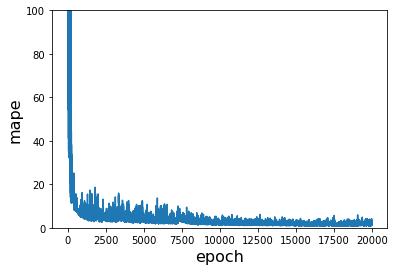

In [19]:
plt.plot(BestModel_temp.history['mape'])

plt.ylabel("mape", fontsize='16')
plt.xlabel("epoch", fontsize='16')
plt.ylim(0,100)

In [20]:
(model.predict(TrainData)-0.5)*dist_value+min_value

array([[2.6701305],
       [2.6680174],
       [2.7558975],
       [2.5114818],
       [2.607223 ],
       [2.614301 ],
       [2.536704 ],
       [2.6305137],
       [2.7706935],
       [2.513488 ],
       [2.5551646],
       [2.56037  ],
       [2.3943698],
       [2.6453888],
       [2.5999646],
       [2.6501865],
       [2.51383  ],
       [2.649798 ],
       [2.6209445],
       [2.5512085],
       [2.5450737],
       [2.5434496],
       [2.686828 ],
       [2.4287841],
       [2.679028 ],
       [2.5309095],
       [2.61945  ],
       [2.5373077],
       [2.4655871],
       [2.517045 ],
       [2.6276202],
       [2.6920245],
       [2.5149958],
       [2.6192589],
       [2.6432352],
       [2.493648 ],
       [2.5123072],
       [2.6199133],
       [2.4552197],
       [2.619927 ],
       [2.6079955],
       [2.5595484],
       [2.273078 ],
       [2.2986617],
       [2.6681154],
       [2.6248071],
       [2.5425878],
       [2.4128454],
       [2.5872796],
       [2.6025505],


In [21]:
type(TrainLabel_)

numpy.ndarray

In [22]:
TrainLabel_

array([2.68231693, 2.6752871 , 2.7661999 , 2.50055638, 2.61383045,
       2.62716472, 2.53235615, 2.63733247, 2.78324088, 2.51905045,
       2.57290184, 2.5706597 , 2.39397281, 2.65690773, 2.59972384,
       2.66206542, 2.51448003, 2.65570049, 2.62434107, 2.56419245,
       2.54921624, 2.54456353, 2.69980801, 2.43492407, 2.69718814,
       2.54782709, 2.62831726, 2.5351122 , 2.45294398, 2.51479453,
       2.63344434, 2.70615981, 2.51852286, 2.62654924, 2.65095377,
       2.48837062, 2.50698465, 2.62480069, 2.46122584, 2.628411  ,
       2.60247111, 2.56278813, 2.27201235, 2.30951196, 2.67216483,
       2.64679312, 2.55252164, 2.4151291 , 2.58442181, 2.61504894,
       2.69135471, 2.60264883, 2.55534014, 2.31734496, 2.58114993,
       2.54637453, 2.49577829, 2.28519499, 2.70329196, 2.62943422,
       2.47935501, 2.54533613, 2.50602561, 2.52814952, 2.48286995,
       2.61583794, 2.67682412, 2.52404741, 2.47316492, 2.56619853,
       2.49154711, 2.50645929, 2.4994916 , 2.37220115, 2.46727

In [23]:
TrainLabel_[99]

2.47744754

In [24]:
ErrorTable = np.zeros((TrainLabel.shape[0],4))
ErrorTable[:,0] = TrainLabel_
for i in range(TrainLabel.shape[0]):
    a = ((model.predict(TrainData)-0.5)*dist_value+min_value)[i]
    ErrorTable[i,1] = a
    ErrorTable[i,2] = ((TrainLabel_[i]-a)/TrainLabel_[i])*100
    ErrorTable[i,3] = np.abs(((TrainLabel_[i]-a)/TrainLabel_[i])*100)

In [25]:
ErrorTable = pd.DataFrame(ErrorTable)
ErrorTable

,0,1,2,3
0,2.682317,2.670130,0.454328,0.454328
1,2.675287,2.668017,0.271732,0.271732
2,2.766200,2.755898,0.372435,0.372435
3,2.500556,2.511482,-0.436914,0.436914
4,2.613830,2.607223,0.252791,0.252791
...,...,...,...,...
95,2.614353,2.611056,0.126106,0.126106
96,2.513997,2.522615,-0.342824,0.342824
97,2.517421,2.503032,0.571579,0.571579
98,2.687295,2.681642,0.210366,0.210366


In [26]:
np.mean(ErrorTable.iloc[:,3])

0.27966731174383314

In [27]:
ErrorTable.to_csv('D:/testoneblow/test5/ANN_prediction5.0/ErrorTable.csv')

## K fold

In [28]:
Fold = 5
FoldDataNo = int(TrainData.shape[0]/Fold)
FoldDataNo

20

In [29]:
TrainData.shape

(100, 35)

In [30]:
TrainLabel

,0
0,1.302585
1,1.288835
2,1.466667
3,0.947049
4,1.168621
...,...
95,1.169643
96,0.973339
97,0.980037
98,1.312322


In [31]:
#Validation dataset
for i in range(Fold):
    
    temp_Valid_Data   = TrainData.iloc[FoldDataNo*i:FoldDataNo*(i+1) ,:]
    s1 = 'ValidData_Fold%d = temp_Valid_Data'%(i+1)
    exec(s1)
    
    temp_Valid_Label  = TrainLabel.iloc[FoldDataNo*i:FoldDataNo*(i+1) ,:]
    s2 = 'ValidLabel_Fold%d = temp_Valid_Label'%(i+1)
    exec(s2)

ValidData_Fold1

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,110.674400,110.674400,110.674400,110.674400,110.674400,110.674400,110.547905,110.173637,109.737999,109.298943,...,85.898918,80.192070,80.139152,80.087791,80.043541,80.006828,79.999992,79.999992,79.999992,79.999992
1,102.816795,102.816795,102.816795,102.816795,102.816795,102.816795,102.709770,102.393089,102.024467,101.652946,...,81.323662,80.576164,80.417442,80.263390,80.130669,80.020531,79.999992,79.999992,79.999992,79.999992
2,117.379601,117.379601,117.379601,117.379601,117.379601,117.379601,117.335808,117.206261,117.055473,116.903465,...,83.894707,80.960289,80.695763,80.438988,80.217796,80.034233,79.999992,79.999992,79.999992,79.999992
3,94.803185,94.803185,94.803185,94.803185,94.803185,94.803185,94.666954,94.263908,93.794762,93.321953,...,87.370323,81.344414,80.974052,80.614586,80.304894,80.047905,79.999992,79.999992,79.999992,79.999992
4,100.661186,100.661186,100.661186,100.661186,100.661186,100.661186,100.792564,101.181206,101.633598,102.089561,...,82.614128,81.728508,81.252373,80.790154,80.392021,80.061607,79.999992,79.999992,79.999992,79.999992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,106.951988,106.951988,106.951988,106.951988,106.951988,106.951988,106.562767,105.411217,104.070793,102.719841,...,89.727898,85.953789,84.313713,82.721703,81.350304,80.212212,79.999992,79.999992,79.999992,79.999992
16,88.315605,88.315605,88.315605,88.315605,88.315605,88.315605,88.563744,89.297844,90.152367,91.013603,...,93.384453,86.337913,84.592033,82.897301,81.437431,80.225883,79.999992,79.999992,79.999992,79.999992
17,97.834404,97.834404,97.834404,97.834404,97.834404,97.834404,98.194450,99.259636,100.499504,101.749138,...,88.175957,86.722038,84.870354,83.072868,81.524559,80.239586,79.999992,79.999992,79.999992,79.999992
18,82.471184,82.471184,82.471184,82.471184,82.471184,82.471184,82.480919,82.509727,82.543236,82.576988,...,94.727196,87.106163,85.148644,83.248467,81.611656,80.253288,79.999992,79.999992,79.999992,79.999992


In [32]:
#Training Dataset
for i in range(Fold):
    temp_Train_Data_Front = TrainData.iloc[:FoldDataNo*i,:]
    temp_Train_Data_Back  = TrainData.iloc[FoldDataNo*(i+1):,:]
    temp_Train_Data_Total = np.concatenate([temp_Train_Data_Front , temp_Train_Data_Back] , axis=0)
    s1 ='TrainData_Fold%d  = temp_Train_Data_Total'%(i+1)
    exec(s1)

    temp_Train_Label_Front = TrainLabel.iloc[:FoldDataNo*i,:]
    temp_Train_Label_Back  = TrainLabel.iloc[FoldDataNo*(i+1):,:]
    temp_Train_Label_Total = np.concatenate([temp_Train_Label_Front , temp_Train_Label_Back] , axis=0)
    s2 ='TrainLabel_Fold%d  = temp_Train_Label_Total'%(i+1)
    exec(s2)
    
TrainData_Fold1.shape , TrainLabel_Fold1.shape

((80, 35), (80, 1))

In [33]:
Model = ['thickness']

# 고정 하이퍼파라미터 : 입력/출력층 뉴런 수, 학습 Epoch 수
noOfNeuron_in  = 50
noOfNeuron_out = 1

In [34]:
for F in range(Fold):
    s1 = 'TrainData  = TrainData_Fold%d'%(F+1)
    exec(s1)
    s2 = 'TrainLabel = TrainLabel_Fold%d'%(F+1)
    exec(s2)
    
    for M in range(1):

        Tr_result_temp = pd.read_csv('D:/testoneblow/test5/ANN_prediction5.0/Tr_result_epoch5000.csv')
        learningRate   = Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,1]
        noOfNeuron1    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,2])
        noOfNeuron2    = np.int(Tr_result_temp.sort_values(['MAE'],ascending=True).iloc[0,3])
        Epoch          = 20000

        print('\n\n\nPrediction :' + Model[M])
        print('Learning rate : {:.3}'.format(learningRate))
        print('Hidden 1 neuron : %d'%(noOfNeuron1))
        print('Hidden 2 neuron : %d'%(noOfNeuron2))

    #     exec('Label_Trn = TrainLabel_%d'%(M+1))

        ################ 신경망 구조 재설계 ################

        tf.keras.backend.clear_session()
        def ANN_model(input_data):
            model = keras.Sequential()
            model.add(keras.layers.Dense(units = noOfNeuron_in,
                                         input_shape = (input_data.shape[1],), activation = 'relu'))  # Input  Layer
            model.add(keras.layers.Dense(units = noOfNeuron1,                  activation = 'relu'))  # Hidden Layer 1
            model.add(keras.layers.Dense(units = noOfNeuron2,                  activation = 'relu'))  # Hidden Layer 2
            model.add(keras.layers.Dense(units = noOfNeuron_out,               )) # Output Layer
            model.compile(optimizer= keras.optimizers.Adam(learning_rate = learningRate),
                          loss=keras.losses.mean_absolute_error,
                          metrics=['mse','mae','mape'])
            return model
        model = ANN_model(TrainData)

        ################ 신경망 학습 ################

        BestModel_temp = model.fit(TrainData, TrainLabel, epochs=Epoch, verbose=0, callbacks=[AccuracyPerEpoch()], batch_size=100)
        print("\n[Final Epochs]    RMSE:{:.5f},   MAE: {:.5f},  MAPE: {:.2f}%"
              .format(np.sqrt(BestModel_temp.history['mse'][-1]), BestModel_temp.history['mae'][-1], BestModel_temp.history['mape'][-1]))

        # 모델 저장
        model.save('D:/testoneblow/test5/ANN_prediction5.0/k-fold/BestModel_M%d_Fold%d.h5'%(M+1,F+1))

        # 히스토리 저장
        RMSE  = np.sqrt(np.array(BestModel_temp.history['mse'])[:, np.newaxis])
        MAE   = np.array(BestModel_temp.history['mae'])[:, np.newaxis]
        MAPE  = np.array(BestModel_temp.history['mape'])[:, np.newaxis]

        History_temp = pd.DataFrame(np.concatenate([RMSE,MAE,MAPE],axis=1))
        History_temp.to_csv("D:/testoneblow/test5/ANN_prediction5.0/k-fold/BestModel_M%d_Fold%d_history.csv"%(M+1,F+1), index=None)




Prediction :thickness
Learning rate : 0.005
Hidden 1 neuron : 40
Hidden 2 neuron : 30
[0 Epochs]    RMSE:11.83172,   MAE: 11.31906,  MAPE: 1143.90%
[100 Epochs]    RMSE:0.75708,   MAE: 0.71601,  MAPE: 73.32%
[200 Epochs]    RMSE:0.35187,   MAE: 0.31379,  MAPE: 36.09%
[300 Epochs]    RMSE:0.14719,   MAE: 0.11226,  MAPE: 12.67%
[400 Epochs]    RMSE:0.15783,   MAE: 0.12743,  MAPE: 14.95%
[500 Epochs]    RMSE:0.15261,   MAE: 0.11844,  MAPE: 12.39%
[600 Epochs]    RMSE:0.15318,   MAE: 0.12284,  MAPE: 14.27%
[700 Epochs]    RMSE:0.14354,   MAE: 0.11251,  MAPE: 12.98%
[800 Epochs]    RMSE:0.20345,   MAE: 0.16882,  MAPE: 16.30%
[900 Epochs]    RMSE:0.14381,   MAE: 0.10412,  MAPE: 10.56%
[1000 Epochs]    RMSE:0.15136,   MAE: 0.11806,  MAPE: 11.60%
[1100 Epochs]    RMSE:0.10128,   MAE: 0.07767,  MAPE: 8.59%
[1200 Epochs]    RMSE:0.08946,   MAE: 0.07269,  MAPE: 8.15%
[1300 Epochs]    RMSE:0.10046,   MAE: 0.07557,  MAPE: 8.43%
[1400 Epochs]    RMSE:0.08839,   MAE: 0.07056,  MAPE: 7.52%
[1500 Ep

[13600 Epochs]    RMSE:0.03791,   MAE: 0.03116,  MAPE: 3.18%
[13700 Epochs]    RMSE:0.01165,   MAE: 0.00882,  MAPE: 0.96%
[13800 Epochs]    RMSE:0.03435,   MAE: 0.02932,  MAPE: 3.05%
[13900 Epochs]    RMSE:0.02881,   MAE: 0.02367,  MAPE: 2.45%
[14000 Epochs]    RMSE:0.01851,   MAE: 0.01442,  MAPE: 1.53%
[14100 Epochs]    RMSE:0.01312,   MAE: 0.01089,  MAPE: 1.18%
[14200 Epochs]    RMSE:0.04684,   MAE: 0.03928,  MAPE: 4.26%
[14300 Epochs]    RMSE:0.01867,   MAE: 0.01542,  MAPE: 1.64%
[14400 Epochs]    RMSE:0.04445,   MAE: 0.03666,  MAPE: 3.75%
[14500 Epochs]    RMSE:0.04757,   MAE: 0.04395,  MAPE: 4.47%
[14600 Epochs]    RMSE:0.01230,   MAE: 0.00970,  MAPE: 1.01%
[14700 Epochs]    RMSE:0.02723,   MAE: 0.02296,  MAPE: 2.44%
[14800 Epochs]    RMSE:0.02739,   MAE: 0.02342,  MAPE: 2.41%
[14900 Epochs]    RMSE:0.01792,   MAE: 0.01450,  MAPE: 1.59%
[15000 Epochs]    RMSE:0.01944,   MAE: 0.01509,  MAPE: 1.59%
[15100 Epochs]    RMSE:0.01628,   MAE: 0.01381,  MAPE: 1.46%
[15200 Epochs]    RMSE:0

[7100 Epochs]    RMSE:0.02606,   MAE: 0.02140,  MAPE: 2.16%
[7200 Epochs]    RMSE:0.03646,   MAE: 0.02892,  MAPE: 2.90%
[7300 Epochs]    RMSE:0.02714,   MAE: 0.02172,  MAPE: 2.22%
[7400 Epochs]    RMSE:0.03422,   MAE: 0.02670,  MAPE: 2.65%
[7500 Epochs]    RMSE:0.02349,   MAE: 0.01820,  MAPE: 1.83%
[7600 Epochs]    RMSE:0.02087,   MAE: 0.01627,  MAPE: 1.66%
[7700 Epochs]    RMSE:0.04542,   MAE: 0.03731,  MAPE: 3.96%
[7800 Epochs]    RMSE:0.02930,   MAE: 0.02385,  MAPE: 2.47%
[7900 Epochs]    RMSE:0.02103,   MAE: 0.01586,  MAPE: 1.54%
[8000 Epochs]    RMSE:0.04991,   MAE: 0.03938,  MAPE: 3.78%
[8100 Epochs]    RMSE:0.03214,   MAE: 0.02511,  MAPE: 2.46%
[8200 Epochs]    RMSE:0.02489,   MAE: 0.01897,  MAPE: 1.93%
[8300 Epochs]    RMSE:0.02099,   MAE: 0.01657,  MAPE: 1.68%
[8400 Epochs]    RMSE:0.06054,   MAE: 0.05345,  MAPE: 5.51%
[8500 Epochs]    RMSE:0.01997,   MAE: 0.01434,  MAPE: 1.42%
[8600 Epochs]    RMSE:0.02719,   MAE: 0.02136,  MAPE: 2.08%
[8700 Epochs]    RMSE:0.02357,   MAE: 0.

[400 Epochs]    RMSE:0.17801,   MAE: 0.16141,  MAPE: 16.93%
[500 Epochs]    RMSE:0.06441,   MAE: 0.05096,  MAPE: 5.23%
[600 Epochs]    RMSE:0.05912,   MAE: 0.04894,  MAPE: 4.86%
[700 Epochs]    RMSE:0.05914,   MAE: 0.04635,  MAPE: 4.86%
[800 Epochs]    RMSE:0.07911,   MAE: 0.06767,  MAPE: 6.46%
[900 Epochs]    RMSE:0.05252,   MAE: 0.04179,  MAPE: 4.24%
[1000 Epochs]    RMSE:0.04847,   MAE: 0.03825,  MAPE: 3.85%
[1100 Epochs]    RMSE:0.06581,   MAE: 0.05333,  MAPE: 5.30%
[1200 Epochs]    RMSE:0.06492,   MAE: 0.05234,  MAPE: 5.49%
[1300 Epochs]    RMSE:0.05418,   MAE: 0.04395,  MAPE: 4.32%
[1400 Epochs]    RMSE:0.07794,   MAE: 0.06808,  MAPE: 7.05%
[1500 Epochs]    RMSE:0.06954,   MAE: 0.05697,  MAPE: 5.77%
[1600 Epochs]    RMSE:0.04719,   MAE: 0.03797,  MAPE: 3.92%
[1700 Epochs]    RMSE:0.05564,   MAE: 0.04598,  MAPE: 4.75%
[1800 Epochs]    RMSE:0.05639,   MAE: 0.04615,  MAPE: 4.78%
[1900 Epochs]    RMSE:0.04591,   MAE: 0.03641,  MAPE: 3.72%
[2000 Epochs]    RMSE:0.03886,   MAE: 0.03143

[14100 Epochs]    RMSE:0.02398,   MAE: 0.01906,  MAPE: 1.79%
[14200 Epochs]    RMSE:0.01034,   MAE: 0.00850,  MAPE: 0.87%
[14300 Epochs]    RMSE:0.02817,   MAE: 0.02230,  MAPE: 2.30%
[14400 Epochs]    RMSE:0.03092,   MAE: 0.02462,  MAPE: 2.37%
[14500 Epochs]    RMSE:0.02146,   MAE: 0.01691,  MAPE: 1.59%
[14600 Epochs]    RMSE:0.01995,   MAE: 0.01660,  MAPE: 1.61%
[14700 Epochs]    RMSE:0.01642,   MAE: 0.01362,  MAPE: 1.32%
[14800 Epochs]    RMSE:0.02236,   MAE: 0.01842,  MAPE: 1.85%
[14900 Epochs]    RMSE:0.02881,   MAE: 0.02452,  MAPE: 2.33%
[15000 Epochs]    RMSE:0.02087,   MAE: 0.01668,  MAPE: 1.55%
[15100 Epochs]    RMSE:0.01982,   MAE: 0.01643,  MAPE: 1.63%
[15200 Epochs]    RMSE:0.01408,   MAE: 0.01074,  MAPE: 1.02%
[15300 Epochs]    RMSE:0.04372,   MAE: 0.03646,  MAPE: 3.50%
[15400 Epochs]    RMSE:0.03227,   MAE: 0.02813,  MAPE: 2.76%
[15500 Epochs]    RMSE:0.04182,   MAE: 0.03055,  MAPE: 3.16%
[15600 Epochs]    RMSE:0.01216,   MAE: 0.00995,  MAPE: 0.98%
[15700 Epochs]    RMSE:0

[7600 Epochs]    RMSE:0.03617,   MAE: 0.03123,  MAPE: 3.20%
[7700 Epochs]    RMSE:0.04767,   MAE: 0.03825,  MAPE: 3.76%
[7800 Epochs]    RMSE:0.03861,   MAE: 0.03158,  MAPE: 3.14%
[7900 Epochs]    RMSE:0.05328,   MAE: 0.04522,  MAPE: 4.87%
[8000 Epochs]    RMSE:0.02986,   MAE: 0.02314,  MAPE: 2.26%
[8100 Epochs]    RMSE:0.02863,   MAE: 0.02210,  MAPE: 2.19%
[8200 Epochs]    RMSE:0.03152,   MAE: 0.02532,  MAPE: 2.54%
[8300 Epochs]    RMSE:0.04863,   MAE: 0.04025,  MAPE: 4.14%
[8400 Epochs]    RMSE:0.02916,   MAE: 0.02350,  MAPE: 2.15%
[8500 Epochs]    RMSE:0.05605,   MAE: 0.04883,  MAPE: 4.84%
[8600 Epochs]    RMSE:0.03471,   MAE: 0.02653,  MAPE: 2.72%
[8700 Epochs]    RMSE:0.03297,   MAE: 0.02428,  MAPE: 2.48%
[8800 Epochs]    RMSE:0.02959,   MAE: 0.02488,  MAPE: 2.61%
[8900 Epochs]    RMSE:0.02506,   MAE: 0.02117,  MAPE: 2.05%
[9000 Epochs]    RMSE:0.02114,   MAE: 0.01709,  MAPE: 1.69%
[9100 Epochs]    RMSE:0.02404,   MAE: 0.01815,  MAPE: 1.91%
[9200 Epochs]    RMSE:0.01689,   MAE: 0.

[1000 Epochs]    RMSE:0.12180,   MAE: 0.09712,  MAPE: 9.95%
[1100 Epochs]    RMSE:0.06770,   MAE: 0.05221,  MAPE: 5.29%
[1200 Epochs]    RMSE:0.07693,   MAE: 0.05977,  MAPE: 6.39%
[1300 Epochs]    RMSE:0.07574,   MAE: 0.05842,  MAPE: 6.03%
[1400 Epochs]    RMSE:0.07870,   MAE: 0.06412,  MAPE: 6.30%
[1500 Epochs]    RMSE:0.07124,   MAE: 0.05449,  MAPE: 5.70%
[1600 Epochs]    RMSE:0.06379,   MAE: 0.05015,  MAPE: 5.06%
[1700 Epochs]    RMSE:0.05116,   MAE: 0.03964,  MAPE: 3.88%
[1800 Epochs]    RMSE:0.06379,   MAE: 0.04872,  MAPE: 4.98%
[1900 Epochs]    RMSE:0.06155,   MAE: 0.04787,  MAPE: 4.80%
[2000 Epochs]    RMSE:0.04878,   MAE: 0.03982,  MAPE: 3.72%
[2100 Epochs]    RMSE:0.13915,   MAE: 0.11783,  MAPE: 10.81%
[2200 Epochs]    RMSE:0.03874,   MAE: 0.03162,  MAPE: 3.08%
[2300 Epochs]    RMSE:0.04062,   MAE: 0.03328,  MAPE: 3.21%
[2400 Epochs]    RMSE:0.07309,   MAE: 0.05947,  MAPE: 5.99%
[2500 Epochs]    RMSE:0.05207,   MAE: 0.03989,  MAPE: 4.17%
[2600 Epochs]    RMSE:0.05070,   MAE: 0

[14600 Epochs]    RMSE:0.01926,   MAE: 0.01611,  MAPE: 1.67%
[14700 Epochs]    RMSE:0.01925,   MAE: 0.01585,  MAPE: 1.64%
[14800 Epochs]    RMSE:0.00885,   MAE: 0.00718,  MAPE: 0.74%
[14900 Epochs]    RMSE:0.03291,   MAE: 0.02888,  MAPE: 2.72%
[15000 Epochs]    RMSE:0.01732,   MAE: 0.01522,  MAPE: 1.53%
[15100 Epochs]    RMSE:0.02749,   MAE: 0.02351,  MAPE: 2.24%
[15200 Epochs]    RMSE:0.02332,   MAE: 0.01863,  MAPE: 1.79%
[15300 Epochs]    RMSE:0.01379,   MAE: 0.01120,  MAPE: 1.17%
[15400 Epochs]    RMSE:0.02065,   MAE: 0.01628,  MAPE: 1.63%
[15500 Epochs]    RMSE:0.01537,   MAE: 0.01295,  MAPE: 1.28%
[15600 Epochs]    RMSE:0.01955,   MAE: 0.01602,  MAPE: 1.55%
[15700 Epochs]    RMSE:0.01110,   MAE: 0.00896,  MAPE: 0.91%
[15800 Epochs]    RMSE:0.02310,   MAE: 0.01770,  MAPE: 1.68%
[15900 Epochs]    RMSE:0.01110,   MAE: 0.00896,  MAPE: 0.90%
[16000 Epochs]    RMSE:0.02050,   MAE: 0.01652,  MAPE: 1.68%
[16100 Epochs]    RMSE:0.01576,   MAE: 0.01216,  MAPE: 1.27%
[16200 Epochs]    RMSE:0

In [35]:
for F in range(Fold):
    s = "Model_Fold%d = keras.models.load_model('D:/testoneblow/test5/ANN_prediction5.0/k-fold/BestModel_M1_Fold%d.h5')"%(F+1,F+1)
    exec(s)
    

In [36]:
for F in range (Fold):
    s1 = "real = ((ValidLabel_Fold%d)-0.5)*dist_value+min_value"%(F+1)
    exec(s1)
    s2 = "predict = (Model_Fold%d.predict(ValidData_Fold%d)-0.5)*dist_value+min_value"%(F+1,F+1)
    exec(s2)
    s3 = 'Result_Fold%d =  pd.DataFrame(np.concatenate((real,predict), axis = 1))'%(F+1)
    exec(s3)

In [37]:
Error = pd.DataFrame(((Result_Fold1.iloc[:,0]-Result_Fold1.iloc[:,1])/Result_Fold1.iloc[:,0])*100)
absError = np.abs(Error)
Result1 = pd.DataFrame(np.concatenate((Result_Fold1,Error,absError),axis = 1))
Result1

,0,1,2,3
0,2.682317,2.662247,0.748224,0.748224
1,2.675287,2.697576,-0.833142,0.833142
2,2.766200,2.797883,-1.145367,1.145367
3,2.500556,2.517138,-0.663108,0.663108
4,2.613830,2.610769,0.117133,0.117133
...,...,...,...,...
15,2.662065,2.623347,1.454458,1.454458
16,2.514480,2.481075,1.328514,1.328514
17,2.655700,2.667390,-0.440153,0.440153
18,2.624341,2.596612,1.056621,1.056621


In [38]:
for F in range (Fold):
    exec("MAE = pd.DataFrame(np.abs(Result_Fold%d.iloc[:,0]-Result_Fold%d.iloc[:,1]))"%(F+1,F+1))
    s1 = 'Error = pd.DataFrame(((Result_Fold%d.iloc[:,0]-Result_Fold%d.iloc[:,1])/Result_Fold%d.iloc[:,0])*100)'%(F+1,F+1,F+1)
    exec(s1)
    s2 = 'Result%d = pd.DataFrame(np.concatenate((Result_Fold%d,Error,np.abs(Error),MAE),axis = 1))'%(F+1,F+1)
    exec(s2)
    s3 = "Result%d.to_csv('D:/testoneblow/test5/ANN_prediction5.0/k-fold/Result%d.csv')"%(F+1,F+1)
    exec(s3)

In [39]:
Result1

,0,1,2,3,4
0,2.682317,2.662247,0.748224,0.748224,0.020070
1,2.675287,2.697576,-0.833142,0.833142,0.022289
2,2.766200,2.797883,-1.145367,1.145367,0.031683
3,2.500556,2.517138,-0.663108,0.663108,0.016581
4,2.613830,2.610769,0.117133,0.117133,0.003062
...,...,...,...,...,...
15,2.662065,2.623347,1.454458,1.454458,0.038719
16,2.514480,2.481075,1.328514,1.328514,0.033405
17,2.655700,2.667390,-0.440153,0.440153,0.011689
18,2.624341,2.596612,1.056621,1.056621,0.027729


In [40]:
average_Error_Fold = []
Max_Error_Fold = []
for F in range(Fold):
    exec("a = np.mean(Result%d.iloc[:,3])"%(F+1))
    average_Error_Fold = np.append(average_Error_Fold,a)
    exec("b = np.max(Result%d.iloc[:,3])"%(F+1))
    Max_Error_Fold = np.append(Max_Error_Fold,b)

In [41]:
average_Error_Fold

array([1.06156755, 0.69258554, 2.06465079, 1.0738825 , 1.10176957])

In [42]:
average_Error = np.mean(average_Error_Fold)
average_Error

1.1988911901567147

In [43]:
Max_Error_Fold

array([2.49517998, 2.40214962, 5.72198874, 3.05522138, 4.13047271])